In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import random
train = pd.read_csv('../data/raw/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
vector = train.iloc[0].drop('label').values
array = vector.reshape((28, 28))

Label: 0


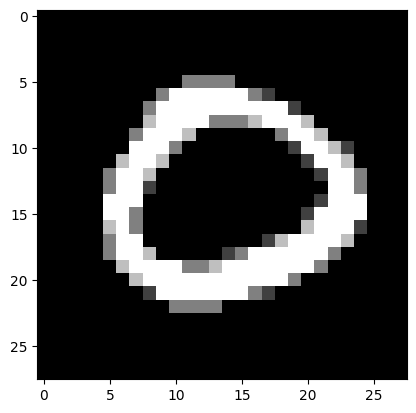

In [31]:
random_index = random.randint(0, 42000)
img_vector = train.iloc[random_index].drop('label').values
img_array = img_vector.reshape((28, 28))
plt.imshow(img_array, cmap="gray")
print("Label:", train.iloc[random_index]['label'])

In [32]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn
import torch
from torchinfo import summary
# Initiate device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Get the pretrained model
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights).to(device)

In [33]:
# Get the weight transforms
transform = weights.transforms()

# Freeze all the base layers
for param in model.parameters():
    param.requires_grad = False

In [34]:
from torchinfo import summary
summary(model=model,
        input_size=(1, 3, 224, 224),  # Example but make sure this matches what the model expects
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   False
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   False
│    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [1, 64, 56, 56]      [1, 64, 56, 56]      (4,096)              False
│    │    └─

In [35]:
model.fc = nn.Sequential(                         # You can use torchinfo to see the name of the last layer (here 'fc')
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=2048, out_features=10),  # It helps to use torchinfo as below to see correct in_features
)